In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [5]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
... resuming from 1113587712 bytes (29303982 bytes left) ...
100% 1.06G/1.06G [00:01<00:00, 36.5MB/s]
100% 1.06G/1.06G [00:01<00:00, 22.6MB/s]


In [6]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [7]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16

In [8]:
conv_base = VGG16(
    weights='imagenet',
    include_top = False,
    input_shape=(150,150,3)
)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [9]:
model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [10]:
conv_base.trainable = False

In [11]:
from tensorflow.keras.utils import array_to_img, img_to_array, load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [12]:
batch_size = 32

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        '/content/train',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        '/content/test',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [13]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [14]:
history = model.fit(
    train_generator,
    epochs=5,
    validation_data=validation_generator
)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


625/625 ━━━━━━━━━━━━━━━━━━━━ 167s 250ms/step - accuracy: 0.8220 - loss: 0.4483 - val_accuracy: 0.9026 - val_loss: 0.2289
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 187s 240ms/step - accuracy: 0.8956 - loss: 0.2439 - val_accuracy: 0.9116 - val_loss: 0.2075
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 215s 261ms/step - accuracy: 0.9031 - loss: 0.2209 - val_accuracy: 0.9168 - val_loss: 0.1956
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 189s 241ms/step - accuracy: 0.9124 - loss: 0.2099 - val_accuracy: 0.9106 - val_loss: 0.2075
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 199s 237ms/step - accuracy: 0.9139 - loss: 0.2055 - val_accuracy: 0.9094 - val_loss: 0.2147


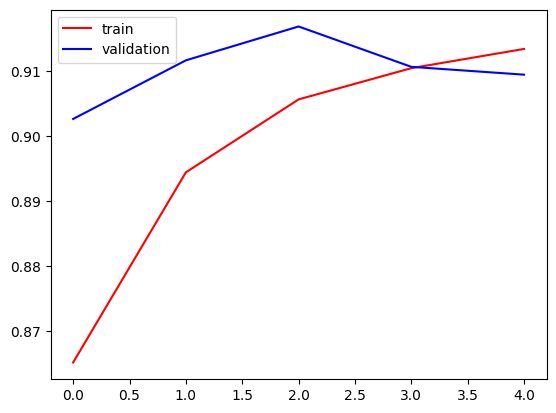

In [15]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

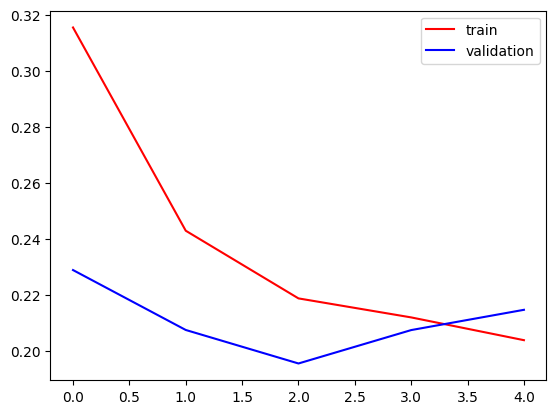

In [16]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()